In [65]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
# Make graphs stay rendered inline below code blocks
#%matplotlib inline

from time import process_time



In [66]:
def plot_graph(title = "2D Burgers Model", save_graph = False):
    fig = plt.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(x, y)
    ax.plot_surface(X, Y, u, cmap=cmap, rstride=1, cstride=1)
    ax.plot_surface(X, Y, v, cmap=cmap, rstride=1, cstride=1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('velocity')
    ax.annotate('t='+str(n), xy=(0.15, 0.9), xycoords='axes fraction', fontsize=12,
                    horizontalalignment='right', verticalalignment='bottom',
               bbox=dict(boxstyle="Square,pad=0.3", fc="white", ec="black", lw=1))
    ax.set_title(title, fontsize=26)
    
    if save_graph == True:
        plt.savefig('change_in_time/'+"nu="+str(nu)+"_"+str(n)+'.png', bbox_inches='tight')
    else:
        plt.show()
    plt.close()

In [78]:
# Variable declarations
# TODO: change variables
#Number of points in x and y
nx = 41
ny = 41
# number of time steps
nt = 120
# Unused constant velocity variable. But not used in this calculation, there we have 2D convection with u,v velocity vectors. Also known as the speed of propogation.
c = 1
#size of steps in x, y
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)

#Sigma is just a method of adjusting difference in time. to change time step
sigma = .0009
# nu is the kinematic viscosity
nu = 0.01
# Calculate dt that won't give blowout for model (where time interval is smaller than change in direction step)
dt = sigma * dx * dy / nu

# create grid in x and y space
x = np.linspace(0,2,nx)
y = np.linspace(0,2,ny)

# Create vectors for velocity vectors
#u and v are used to store data for new current time step in calc loop
u = np.ones((ny, nx))  # create a 1xn vector of 1's
v = np.ones((ny, nx))
# un and uv are for previous time step
un = np.ones((ny, nx)) 
vn = np.ones((ny, nx))
comb = np.ones((ny, nx))

###Assign initial conditions

##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
#Within the space, between the values for velocity vectors, 
# velocity is 2
# everywhere else it's 1
u[int(.5 / dy):int(0.75 / dy + 1),int(.5 / dx):int(0.75 / dx + 1)] = 1.5 
##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
v[int(.5 / dy):int(0.75 / dy + 1),int(.5 / dx):int(0.75 / dx + 1)] = 1.5

u[int(.75 / dy):int(1. / dy + 1),int(.75 / dx):int(1. / dx + 1)] = 2
##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
v[int(.75 / dy):int(1. / dy + 1),int(.75 / dx):int(1. / dx + 1)] = 2

# For plotting
cmap = cm.plasma

In [84]:
print(dx,dy,dt)

0.05 0.05 0.000225


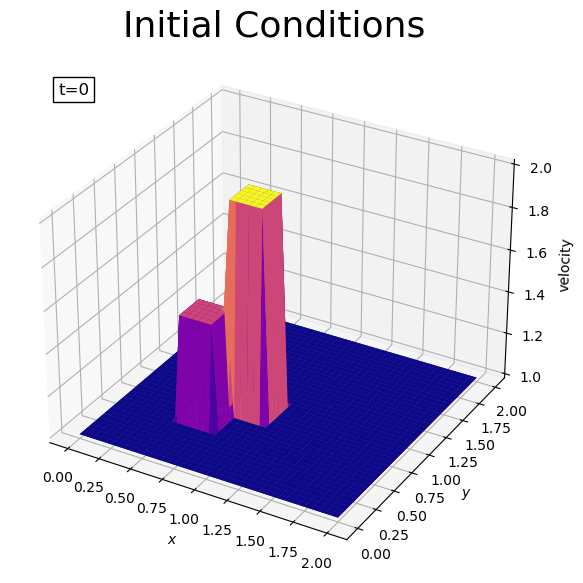

In [80]:
plt.ioff()
###(plot ICs)
n=0
plot_graph(title="Initial Conditions")

In [81]:
t = process_time()

save_plots = False
for n in range(nt+1):
    #Copy current step to calculate next step (calc n+1)
    un = u.copy()
    vn = v.copy()
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            
            #FORWARD DIFFERENCE
            u[i,j] = (un[i,j] - dt/dx *un[i,j] * (un[i,j]-un[i-1,j]) - 
                        dt/dy * vn[i,j] * (un[i,j]-un[i,j-1]) +
                        nu * dt/dx**2 * 
                        (un[i+1,j]-2*un[i,j]+un[i-1,j]) +
                        nu * dt / dy**2 * 
                        (un[i,j-1]-2*un[i,j]+un[i,j+1]))
            
            v[i,j] = (vn[i,j] - dt/dx *un[i,j] * (vn[i,j]-vn[i-1,j]) - 
                        dt/dy * vn[i,j] * (vn[i,j]-vn[i,j-1]) +
                        nu * dt/dx**2 * 
                        (vn[i+1,j]-2*vn[i,j]+vn[i-1,j]) +
                        nu * dt / dy**2 * 
                        (vn[i,j-1]-2*vn[i,j]+vn[i,j+1]))
            
            u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                     dt / dx * un[1:-1, 1:-1] * 
                     (un[1:-1, 1:-1] - un[1:-1, 0:-2]) - 
                     dt / dy * vn[1:-1, 1:-1] * 
                     (un[1:-1, 1:-1] - un[0:-2, 1:-1]) + 
                     nu * dt / dx**2 * 
                     (un[1:-1,2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) + 
                     nu * dt / dy**2 * 
                     (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
    
    # Set boundary conditions
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    
    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1
    
    if save_plots == True:
        plot_graph(title = "2D Burgers Model"+" @ nu="+str(nu),save_graph=save_plots)

elapsed_time = process_time() - t
print(elapsed_time)

12.4375


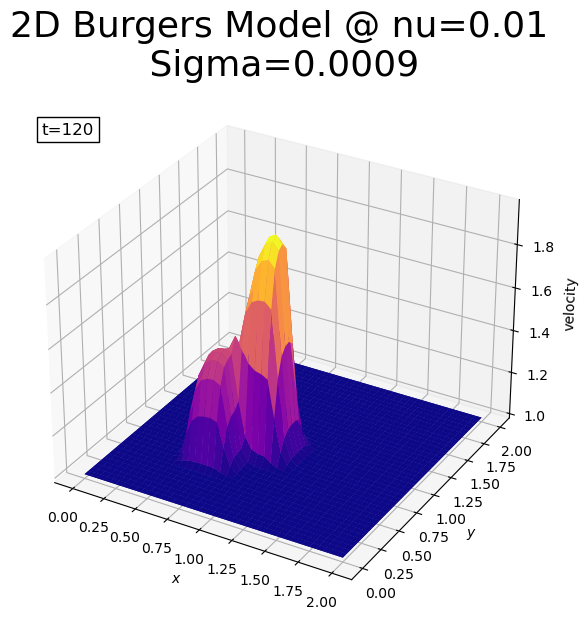

In [82]:
plot_graph(title = "2D Burgers Model"+" @ nu="+str(nu) +"\n Sigma="+str(sigma))

In [83]:
12.4375 / 0.015625

796.0